In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_seq_items = 2000

In [37]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [88]:
# So the dataset is retrieved from: https://crashviewer.nhtsa.dot.gov/CrashAPI
#GET FARS data from accident, pbtype, and vehicle tables 
fars_acc2018 = pd.read_csv('data/FARS/FARS2018/ACCIDENT.csv')
fars_acc2017 = pd.read_csv('data/FARS/FARS2017/ACCIDENT.csv')
fars_acc2016 = pd.read_csv('data/FARS/FARS2016/ACCIDENT.csv')

fars_PB2018 = pd.read_csv('data/FARS/FARS2018/PBTYPE.csv')
fars_PB2017 = pd.read_csv('data/FARS/FARS2017/PBTYPE.csv')
fars_PB2016 = pd.read_csv('data/FARS/FARS2016/PBTYPE.csv')

fars_veh2018 = pd.read_csv('data/FARS/FARS2018/VEHICLE.csv',encoding= 'unicode_escape')
fars_veh2017 = pd.read_csv('data/FARS/FARS2017/VEHICLE.csv',encoding= 'unicode_escape')
fars_veh2016 = pd.read_csv('data/FARS/FARS2016/VEHICLE.csv',encoding= 'unicode_escape')

In [95]:
#Join FARS accident and vehicle tables on state and st_case
fars_acc_veh_2018 = pd.merge(fars_acc2018, fars_veh2018,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])
fars_acc_veh_2017 = pd.merge(fars_acc2017, fars_veh2017,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])
fars_acc_veh_2016 = pd.merge(fars_acc2016, fars_veh2016,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])

In [96]:
#Join FARS accident and vehicle tables on state and st_case
fars_all_2018 = pd.merge(fars_acc_veh_2018, fars_PB2018,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])
fars_all_2017 = pd.merge(fars_acc_veh_2017, fars_PB2017,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])
fars_all_2016 = pd.merge(fars_acc_veh_2016, fars_PB2016,  how='left', left_on=['STATE','ST_CASE'], right_on = ['STATE','ST_CASE'])

In [97]:
FARS_16_17_18 = fars_all_2018.append([fars_all_2017, fars_all_2016])

In [113]:
#GET CRSS data from accident, pbtype, and vehicle tables 
crss_acc2018 = pd.read_csv('data/CRSS/CRSS2018/ACCIDENT.csv')
crss_acc2017 = pd.read_csv('data/CRSS/CRSS2017/ACCIDENT.csv')
crss_acc2016 = pd.read_csv('data/CRSS/CRSS2016/ACCIDENT.csv')

crss_PB2018 = pd.read_csv('data/CRSS/CRSS2018/PBTYPE.csv')
crss_PB2017 = pd.read_csv('data/CRSS/CRSS2017/PBTYPE.csv')
crss_PB2016 = pd.read_csv('data/CRSS/CRSS2016/PBTYPE.csv')

crss_veh2018 = pd.read_csv('data/CRSS/CRSS2018/VEHICLE.csv',encoding= 'unicode_escape')
crss_veh2017 = pd.read_csv('data/CRSS/CRSS2017/VEHICLE.csv',encoding= 'unicode_escape')
crss_veh2016 = pd.read_csv('data/CRSS/CRSS2016/VEHICLE.csv',encoding= 'unicode_escape')

In [114]:
#Join CRSS accident and vehicle tables on state and st_case
crss_acc_veh_2018 = pd.merge(crss_acc2018, crss_veh2018,  how='left', left_on=['CASENUM'], right_on = ['CASENUM'])
crss_acc_veh_2017 = pd.merge(crss_acc2017, crss_veh2017,  how='left', left_on=['CASENUM'], right_on = ['CASENUM'])
crss_acc_veh_2016 = pd.merge(crss_acc2016, crss_veh2016,  how='left', left_on=['CASENUM'], right_on = ['CASENUM'])

In [124]:
crss_all_2018 = pd.merge(crss_acc_veh_2018, crss_PB2018,  how='left', left_on=['CASENUM','VEH_NO'], right_on = ['CASENUM','VEH_NO'])
crss_all_2017 = pd.merge(crss_acc_veh_2017, crss_PB2017,  how='left', left_on=['CASENUM','VEH_NO'], right_on = ['CASENUM','VEH_NO'])
crss_all_2016 = pd.merge(crss_acc_veh_2016, crss_PB2016,  how='left', left_on=['CASENUM','VEH_NO'], right_on = ['CASENUM','VEH_NO'])

In [125]:
CRSS_16_17_18 = crss_all_2018.append([crss_all_2017, crss_all_2016])

In [100]:
##PLOT a count of accidents by year and month
yr_month_count=FARS_16_17_18.groupby(['YEAR','MONTH_x']).ST_CASE.nunique().reset_index().rename(columns={'ST_CASE':'count'})
Months_name = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 
          7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
yr_month_count=yr_month_count.replace({"MONTH_x": Months_name})


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
yr_month_count['month'] = pd.Categorical(yr_month_count['MONTH_x'], categories=months, ordered=True)

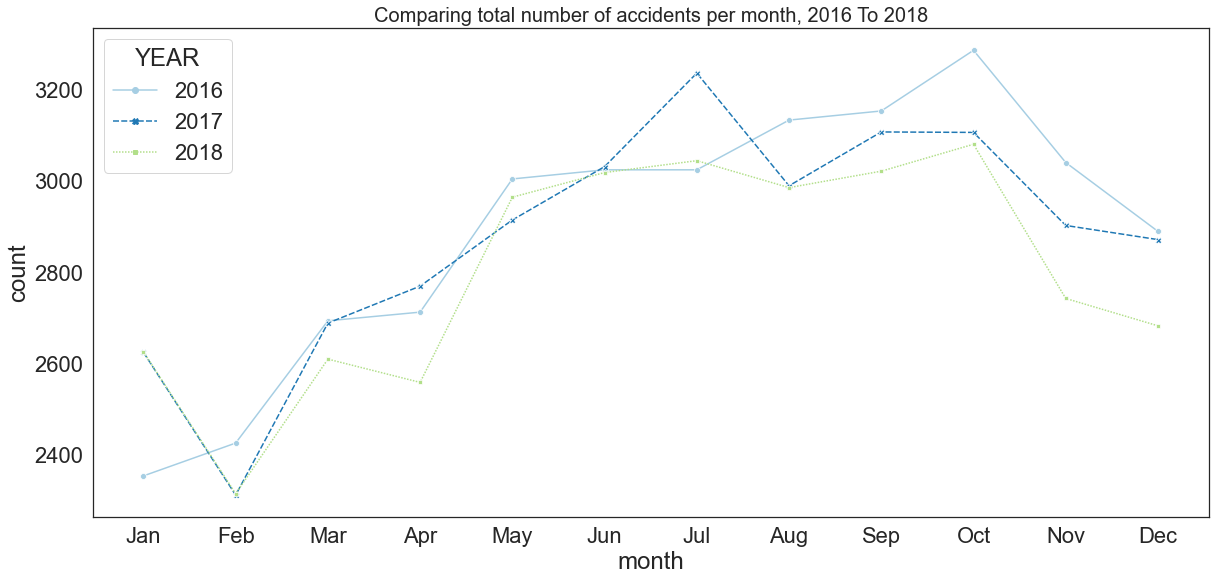

In [105]:
#Comparison of number of fatal accidents from 2016 to 2018
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
yr_month_count['month'] = pd.Categorical(yr_month_count['MONTH_x'], categories=months, ordered=True)
plt.figure(figsize=(20,9))
ax =sns.lineplot(data = yr_month_count, x='month',y='count', hue='YEAR',style="YEAR",ci=None,palette="Paired",markers=True)
ax.set_title('Comparing total number of accidents per month, 2016 To 2018',fontsize=20)
sns.set(font_scale=2)
sns.set_style("white")

plt.show()

In [106]:
pb=FARS_16_17_18[FARS_16_17_18['PBPTYPE'].notna()]

In [108]:
yr_month_count_pb=pb.groupby(['YEAR','MONTH_x']).ST_CASE.nunique().reset_index().rename(columns={'ST_CASE':'count'})

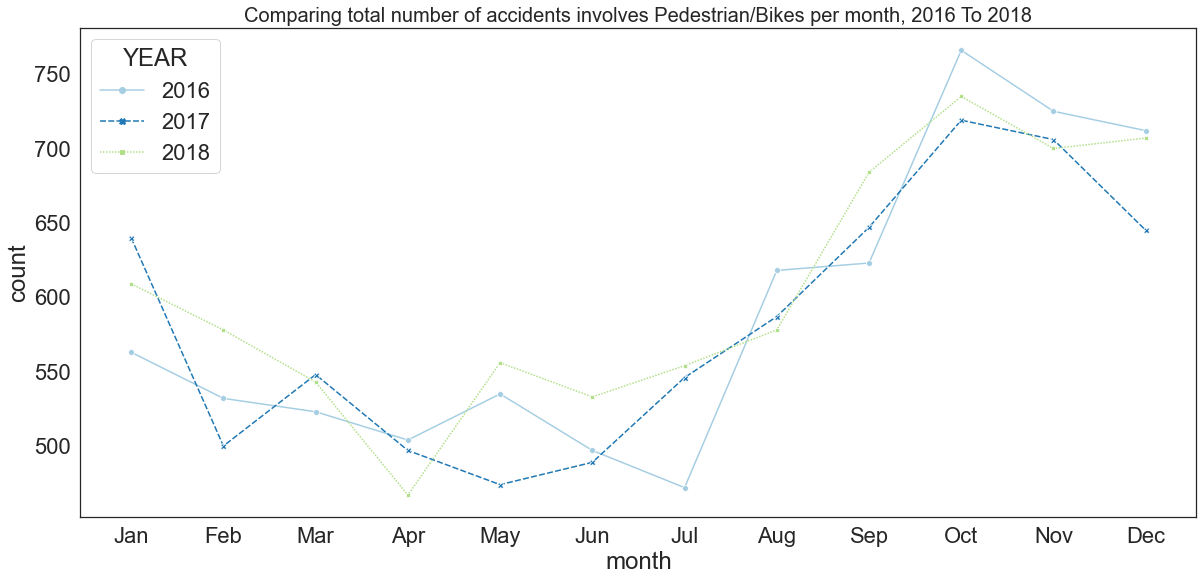

In [112]:
Months_name = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 
          7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
yr_month_count_pb=yr_month_count_pb.replace({"MONTH_x": Months_name})

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
yr_month_count_pb['month'] = pd.Categorical(yr_month_count_pb['MONTH_x'], categories=months, ordered=True)
plt.figure(figsize=(20,9))
ax =sns.lineplot(data = yr_month_count_pb, x='month',y='count', hue='YEAR',style="YEAR",ci=None,palette="Paired",markers=True)
ax.set_title('Comparing total number of accidents involves Pedestrian/Bikes per month, 2016 To 2018',fontsize=20)
sns.set(font_scale=2)
sns.set_style("white")

plt.show()

In [127]:
FARS_16_17_18.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS_x', 'PVH_INVL', 'PEDS', 'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY_x', 'MONTH_x', 'YEAR', 'DAY_WEEK', 'HOUR_x', 'MINUTE_x', 'NHS', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV_x', 'MAN_COLL_x', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'VEH_NO_x', 'VE_FORMS_y', 'NUMOCCS', 'DAY_y', 'MONTH_y', 'HOUR_y', 'MINUTE_y', 'HARM_EV_y', 'MAN_COLL_y', 'UNITTYPE', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE', 'MODEL', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH', 'J_KNIFE', 'MCARR_I1', 'MCARR_I2', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'HAZ_INV',
       'HAZ

In [129]:
FARS_16_17_18.dtypes

STATE         int64  
ST_CASE       int64  
VE_TOTAL      int64  
VE_FORMS_x    int64  
PVH_INVL      int64  
PEDS          int64  
PERNOTMVIT    int64  
PERMVIT       int64  
PERSONS       int64  
COUNTY        int64  
CITY          int64  
DAY_x         int64  
MONTH_x       int64  
YEAR          int64  
DAY_WEEK      int64  
HOUR_x        int64  
MINUTE_x      int64  
NHS           int64  
RUR_URB       int64  
FUNC_SYS      int64  
RD_OWNER      int64  
ROUTE         int64  
TWAY_ID       object 
TWAY_ID2      object 
MILEPT        int64  
LATITUDE      float64
LONGITUD      float64
SP_JUR        int64  
HARM_EV_x     int64  
MAN_COLL_x    int64  
RELJCT1       int64  
RELJCT2       int64  
TYP_INT       int64  
WRK_ZONE      int64  
REL_ROAD      int64  
LGT_COND      int64  
WEATHER1      int64  
WEATHER2      int64  
WEATHER       int64  
SCH_BUS       int64  
RAIL          object 
NOT_HOUR      int64  
NOT_MIN       int64  
ARR_HOUR      int64  
ARR_MIN       int64  
HOSP_HR   

In [150]:
#Filtering records containing Not, Arr and Hosp Time
FARS_hosp_time = FARS_16_17_18[(FARS_16_17_18['NOT_HOUR']!=99) & (FARS_16_17_18['NOT_HOUR']!=88) & 
                                      (FARS_16_17_18['ARR_HOUR']!=99) & (FARS_16_17_18['ARR_HOUR']!=88) & 
                                      (FARS_16_17_18['HOSP_HR']!=99) & (FARS_16_17_18['HOSP_HR']!=88)&
                              (FARS_16_17_18['NOT_MIN']!=99)&(FARS_16_17_18['NOT_MIN']!=88)&
                              (FARS_16_17_18['ARR_MIN']!=99)&(FARS_16_17_18['ARR_MIN']!=88)&
                              (FARS_16_17_18['HOSP_MN']!=99)&(FARS_16_17_18['HOSP_MN']!=88)]
FARS_hosp_time1 = FARS_hosp_time[['NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN']]
FARS_hosp_time1['NOT_MIN'].unique()

array([52, 49, 24, 13,  8, 53, 29, 34,  0, 32, 59, 31,  1, 35, 45, 26, 36,
       37, 55, 12, 22, 10,  7, 30,  2, 20, 47,  5,  4, 57, 28, 51, 44, 58,
       40, 19, 27, 11, 48,  3, 16, 43, 50, 38, 46,  9, 56, 17, 41,  6, 18,
       25, 14, 15, 21, 23, 39, 54, 42, 33])

In [151]:
FARS_hosp_time['Notification_Time'] = (pd.to_datetime(FARS_hosp_time['YEAR'].astype(str) + ':'+
                                                      FARS_hosp_time['MONTH_x'].astype(str) + ':'+
                                                      FARS_hosp_time['DAY_x'].astype(str) + ':'+
                                                      FARS_hosp_time['NOT_HOUR'].astype(str) + ':' +
                                                            FARS_hosp_time['NOT_MIN'].astype(str), 
                                                            format='%Y:%m:%d:%H:%M'))


In [152]:
FARS_hosp_time['Arrival_Time'] = (pd.to_datetime(FARS_hosp_time['YEAR'].astype(str) + ':'+
                                                 FARS_hosp_time['MONTH_x'].astype(str) + ':'+
                                                 FARS_hosp_time['DAY_x'].astype(str) + ':'+
                                                 FARS_hosp_time['ARR_HOUR'].astype(str) + ':' +
                                                 FARS_hosp_time['ARR_MIN'].astype(str), 
                                                             format='%Y:%m:%d:%H:%M'))

In [153]:
FARS_hosp_time['Hospital_Time'] = (pd.to_datetime(FARS_hosp_time['YEAR'].astype(str) + ':'+
                                                      FARS_hosp_time['MONTH_x'].astype(str) + ':'+
                                                      FARS_hosp_time['DAY_x'].astype(str) + ':'+
                                                      FARS_hosp_time['HOSP_HR'].astype(str) + ':' +
                                                           FARS_hosp_time['HOSP_MN'].astype(str), 
                                                            format='%Y:%m:%d:%H:%M'))




In [155]:
FARS_hosp_time['Time_to_Accident'] = (FARS_hosp_time['Arrival_Time'] - 
                                        FARS_hosp_time['Notification_Time'])

FARS_hosp_time['Time_to_Hospital'] = (FARS_hosp_time['Hospital_Time'] - 
                                        FARS_hosp_time['Arrival_Time'])

FARS_hosp_time['Total_Time'] = (FARS_hosp_time['Hospital_Time'] - 
                                        FARS_hosp_time['Notification_Time'])
FARS_hosp_time

,STATE,ST_CASE,VE_TOTAL,VE_FORMS_x,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY_x,MONTH_x,YEAR,DAY_WEEK,HOUR_x,MINUTE_x,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV_x,MAN_COLL_x,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO_x,VE_FORMS_y,NUMOCCS,DAY_y,MONTH_y,HOUR_y,MINUTE_y,HARM_EV_y,MAN_COLL_y,UNITTYPE,HIT_RUN,REG_STAT,OWNER,MAKE,MODEL,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,VIN_1,VIN_2,VIN_3,VIN_4,VIN_5,VIN_6,VIN_7,VIN_8,VIN_9,VIN_10,VIN_11,VIN_12,TOW_VEH,J_KNIFE,MCARR_I1,MCARR_I2,MCARR_ID,GVWR,V_CONFIG,CARGO_BT,HAZ_INV,HAZ_PLAC,HAZ_ID,HAZ_CNO,HAZ_REL,BUS_USE,SPEC_USE,EMER_USE,TRAV_SP,UNDERIDE,ROLLOVER,ROLINLOC,IMPACT1,DEFORMED,TOWED,M_HARM,VEH_SC1,VEH_SC2,FIRE_EXP,DR_PRES,L_STATE,DR_ZIP,L_STATUS,L_TYPE,CDL_STAT,L_ENDORS,L_COMPL,L_RESTRI,DR_HGT,DR_WGT,PREV_ACC,PREV_SUS1,PREV_SUS2,PREV_SUS3,PREV_DWI,PREV_SPD,PREV_OTH,FIRST_MO,FIRST_YR,LAST_MO,LAST_YR,SPEEDREL,DR_SF1,DR_SF2,DR_SF3,DR_SF4,VTRAFWAY,VNUM_LAN,VSPD_LIM,VALIGN,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,TRLR1VIN,TRLR2VIN,TRLR3VIN,DEATHS,DR_DRINK,VEH_NO_y,PER_NO,PBPTYPE,PBAGE,PBSEX,PBCWALK,PBSWALK,PBSZONE,PEDCTYPE,BIKECTYPE,PEDLOC,BIKELOC,PEDPOS,BIKEPOS,PEDDIR,BIKEDIR,MOTDIR,MOTMAN,PEDLEG,PEDSNR,PEDCGP,BIKECGP,PREV_SUS,Notification_Time,Arrival_Time,Hospital_Time,Time_to_Accident,Time_to_Hospital,Total_Time
64,1,10044,2,2,0,0,0,3,3,77,0,15,1,2018,2,15,35,0,1,4,1,3,SR-20,NaN,150,34.851186,-87.753219,0,12,2,0,1,1,0,2,1,1,0,1,0,0000000,15,52,16,36,17,40,0,0,0,2,0,1,2,1,15,1,15,35,12,2,1,0,1,2,2,404,2404,14,1999,1J4G258S8XC5,1,J,4,G,2,5,8,S,8,X,C,5,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,55,0,0,0,12,6,2,12,0,0,0,1,1,35633,6,1,0,0,3,1,64,140,1,0.0,1.0,0.0,1,0,0,1,2013,10,2015,0,28,0,0,0,1,2,55,1,1,2,1,0,0,1,10,16,1,4,50,777777777777,777777777777,777777777777,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 15:52:00,2018-01-15 16:36:00,2018-01-15 17:40:00,0 days 00:44:00,0 days 01:04:00,0 days 01:48:00
65,1,10044,2,2,0,0,0,3,3,77,0,15,1,2018,2,15,35,0,1,4,1,3,SR-20,NaN,150,34.851186,-87.753219,0,12,2,0,1,1,0,2,1,1,0,1,0,0000000,15,52,16,36,17,40,0,0,0,2,0,2,2,2,15,1,15,35,12,2,1,0,1,1,49,402,49402,14,2017,2T3ZFREV7HW3,2,T,3,Z,F,R,E,V,7,H,W,3,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,50,0,0,0,12,6,2,12,0,0,0,1,1,35633,6,1,0,0,3,0,73,210,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,55,1,1,2,1,0,0,1,62,7,1,4,51,777777777777,777777777777,777777777777,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 15:52:00,2018-01-15 16:36:00,2018-01-15 17:40:00,0 days 00:44:00,0 days 01:04:00,0 days 01:48:00
74,1,10049,1,1,0,0,0,5,5,39,0,17,1,2018,4,13,45,0,1,4,1,2,US-SR 15,NaN,321,31.167631,-86.601817,0,34,0,0,1,1,0,4,1,10,0,10,0,0000000,13,49,14,2,15,46,0,0,0,1,0,1,1,5,17,1,13,45,34,0,1,0,1,1,22,18,22018,4,2003,1G2NW52E23C2,1,G,2,N,W,5,2,E,2,3,C,2,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,50,0,1,5,11,6,2,1,0,0,0,1,1,36426,6,1,0,0,3,0,58,138,0,0.0,0.0,0.0,0,0,0,0,0,0,0,4,87,0,0,0,1,2,55,1,6,2,4,0,0,1,5,99,3,4,2,777777777777,777777777777,777777777777,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-17 13:49:00,2018-01-17 14:02:00,2018-01-17 15:46:00,0 days 00:13:00,0 days 01:44:00,0 days 01:57:00
77,1,10051,1,1,0,0,0,1,1,25,0,18,1,2018,5,15,30,0,1,5,2,4,CR-BASHI RD,NaN,0,31.969167,-87.870872,0,34,0,0,1,1,0,4,1,1,0,1,0,0000000,15,24,16,14,17,14,0,0,0,1,1,1,1,1,18,1,15,30,34,0,1,0,1,1,12,473,12473,34,2002,1FMZU67E92UD,1,F,M,Z,U,6,7,E,9,2,U,D,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,999,0,0,0,99,6,2,34,0,0,0,1,1,36784,6,1,0,0,3,0,75,240,2,0.0,0.0,0.0,0,0,1,5,2014,9,2016,4,87,0,0,0,1,2,45,2,1,2,4,0,0,14,6,99,3,4,2,777777777777,777777777777,777777777777,1,1,NaN,NaN,NaN,